<a href="https://colab.research.google.com/github/Alvaroguijarro97/ML_Group_Project/blob/main/Dataframes_combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing basic modules
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [2]:
# import file "foreign_data_by_state_sorted.csv"
from google.colab import files
uploaded = files.upload()

Saving foreign_data_by_state_sorted.csv to foreign_data_by_state_sorted.csv


In [3]:
import io
foreign_data_complete = pd.read_csv(io.BytesIO(uploaded['foreign_data_by_state_sorted.csv']), encoding="windows_1258")

foreign_data_complete = foreign_data_complete.drop([0])

foreign_data_complete = foreign_data_complete.rename(
    columns={
        "Foreign_Population": "Foreign_Population.0",
        "Country_Score": "Country_Score.0",
        "Country": "Country.0"
        },
    index={
        1: "Baden-Württemberg",
        2: "Bavaria",
        3: "Berlin",
        4: "Brandenburg",
        5: "Bremen",
        6: "Hamburg",
        7: "Hesse",
        8: "Mecklenburg Western Pomerania",
        9: "Lower Saxony",
        10: "Northrhine-Westphalia",
        11: "Rhineland Palatinate",
        12: "Saarland",
        13: "Sachsen",
        14: "Sachsen-Anhalt",
        15: "Schleswig-Holstein",
        16: "Thuringia"
        }
        )

In [4]:
foreign_data_complete

,Foreign_Population.0,Foreign_Population.1,Foreign_Population.2,Foreign_Population.3,Foreign_Population.4,Foreign_Population.5,Foreign_Population.6,Foreign_Population.7,Foreign_Population.8,Foreign_Population.9,...,Country_Score.21,Country_Score.22,Country_Score.23,Country_Score.24,Country_Score.25,Country_Score.26,Country_Score.27,Country_Score.28,Country_Score.29,Country_Score.30
Baden-Württemberg,0.000008,0.000031,0.000084,0.000093,0.000113,0.000134,0.000153,0.000195,0.000230,0.000233,...,84.0,60.0,48.0,66.0,43.0,68.0,16.0,60.0,59.0,67.0
Bavaria,0.000013,0.000027,0.000086,0.000092,0.000095,0.000165,0.000197,0.000228,0.000267,0.000293,...,60.0,66.0,48.0,43.0,68.0,61.0,67.0,16.0,60.0,59.0
Berlin,0.000037,0.000135,0.000146,0.000269,0.000282,0.000481,0.000494,0.000688,0.000701,0.000797,...,60.0,60.0,68.0,71.0,89.0,84.0,59.0,66.0,67.0,16.0
Brandenburg,0.000004,0.000008,0.000024,0.000034,0.000053,0.000057,0.000059,0.000073,0.000083,0.000087,...,48.0,71.0,61.0,60.0,68.0,43.0,67.0,66.0,59.0,16.0
Bremen,0.000015,0.000045,0.000067,0.000096,0.000156,0.000171,0.000230,0.000245,0.000267,0.000297,...,48.0,60.0,68.0,71.0,67.0,67.0,60.0,59.0,66.0,16.0
Hamburg,0.000011,0.000033,0.000098,0.000148,0.000183,0.000254,0.000290,0.000295,0.000312,0.000353,...,84.0,71.0,68.0,60.0,60.0,67.0,66.0,67.0,59.0,16.0
Hesse,0.000014,0.000036,0.000085,0.000103,0.000109,0.000178,0.000256,0.000324,0.000360,0.000360,...,67.0,48.0,71.0,60.0,68.0,66.0,60.0,67.0,59.0,16.0
Mecklenburg Western Pomerania,0.000005,0.000015,0.000033,0.000066,0.000071,0.000110,0.000115,0.000131,0.000177,0.000185,...,43.0,60.0,71.0,68.0,60.0,67.0,85.0,66.0,59.0,16.0
Lower Saxony,0.000003,0.000009,0.000032,0.000041,0.000047,0.000047,0.000054,0.000073,0.000089,0.000108,...,60.0,85.0,71.0,68.0,43.0,67.0,62.0,66.0,59.0,16.0
Northrhine-Westphalia,0.000010,0.000048,0.000070,0.000071,0.000121,0.000130,0.000141,0.000165,0.000223,0.000246,...,48.0,71.0,60.0,60.0,85.0,66.0,68.0,67.0,59.0,16.0


In [5]:
# import file "migrant_background_data_by_state_sorted"
from google.colab import files
uploaded = files.upload()

Saving migrant_background_data_by_state_sorted.csv to migrant_background_data_by_state_sorted.csv


In [6]:
import io
migrant_background_data_complete = pd.read_csv(io.BytesIO(uploaded['migrant_background_data_by_state_sorted.csv']), encoding="windows_1258")

migrant_background_data_complete = migrant_background_data_complete.drop([0])

migrant_background_data_complete = migrant_background_data_complete.rename(
    columns={
        "Population with migrant background": "Population with migrant background.0",
        "Country_Score": "Country_Score.0",
        "Country": "Country.0"
        },
    index={
        1: "Baden-Württemberg",
        2: "Bavaria",
        3: "Berlin",
        4: "Brandenburg",
        5: "Bremen",
        6: "Hamburg",
        7: "Hesse",
        8: "Mecklenburg Western Pomerania",
        9: "Lower Saxony",
        10: "Northrhine-Westphalia",
        11: "Rhineland Palatinate",
        12: "Saarland",
        13: "Sachsen",
        14: "Sachsen-Anhalt",
        15: "Schleswig-Holstein",
        16: "Thuringia"
        }
        )

migrant_background_data_complete

,Population with migrant background.0,Population with migrant background.1,Population with migrant background.2,Population with migrant background.3,Population with migrant background.4,Population with migrant background.5,Population with migrant background.6,Population with migrant background.7,Population with migrant background.8,Population with migrant background.9,...,Country_Score.3,Country_Score.4,Country_Score.5,Country_Score.6,Country_Score.7,Country_Score.8,Country_Score.9,Country_Score.10,Country_Score.11,Country_Score.12
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,64.0,71.0,84.0,61.0,43.0,68.0,60.0,16.0,67.0,59.0
Bavaria,0.001548,0.002554,0.003096,0.003173,0.005341,0.005882,0.006502,0.008901,0.011997,0.013777,...,84.0,64.0,68.0,43.0,60.0,67.0,61.0,16.0,59.0,67.0
Berlin,0.004143,0.004419,0.004419,0.005523,0.006076,0.006904,0.007180,0.011875,0.030655,NaN,...,71.0,66.0,61.0,84.0,67.0,16.0,85.0,67.0,64.0,43.0
Brandenburg,0.017785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,67.0,60.0,85.0,61.0,67.0,59.0,71.0,64.0,43.0
Bremen,0.013353,0.035608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,67.0,60.0,85.0,61.0,67.0,59.0,71.0,64.0,43.0
Hamburg,0.007112,0.036105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84.0,68.0,60.0,85.0,61.0,67.0,59.0,71.0,64.0,43.0
Hesse,0.002258,0.003064,0.003709,0.004032,0.004677,0.004999,0.005160,0.006289,0.006451,0.007741,...,67.0,61.0,64.0,71.0,68.0,66.0,60.0,59.0,67.0,16.0
Mecklenburg Western Pomerania,0.001273,0.001655,0.001782,0.002418,0.002546,0.003436,0.003564,0.005473,0.006491,0.007382,...,66.0,61.0,71.0,68.0,67.0,59.0,85.0,16.0,67.0,64.0
Lower Saxony,0.017078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,67.0,60.0,85.0,61.0,67.0,59.0,71.0,64.0,43.0
Northrhine-Westphalia,0.001246,0.001925,0.002265,0.003058,0.003341,0.003398,0.003455,0.003851,0.005663,0.006229,...,66.0,60.0,61.0,67.0,71.0,85.0,59.0,68.0,67.0,16.0


In [155]:
# import file "geographical_data_by_state_sorted"
from google.colab import files
uploaded = files.upload()

Saving geographical_data_by_state_sorted.csv to geographical_data_by_state_sorted (1).csv


In [156]:
import io
geography_data_complete = pd.read_csv(io.BytesIO(uploaded['geographical_data_by_state_sorted.csv']), encoding="windows_1258")
geography_data_complete = geography_data_complete.drop([0])

geography_data_complete = geography_data_complete.rename(
    columns={
        "Distance": "Distance.0",
        "Country_Score": "Country_Score.0",
        "Country": "Country.0"
        },
    index={
        1: "Baden-Württemberg",
        2: "Bavaria",
        3: "Berlin",
        4: "Brandenburg",
        5: "Bremen",
        6: "Hamburg",
        7: "Hesse",
        8: "Mecklenburg Western Pomerania",
        9: "Lower Saxony",
        10: "Northrhine-Westphalia",
        11: "Rhineland Palatinate",
        12: "Saarland",
        13: "Sachsen",
        14: "Sachsen-Anhalt",
        15: "Schleswig-Holstein",
        16: "Thuringia"
        }
        )



In [157]:
geography_data_complete

,Distance.0,Distance.1,Distance.2,Distance.3,Distance.4,Distance.5,Distance.6,Distance.7,Distance.8,Distance.9,...,Country_Score.21,Country_Score.22,Country_Score.23,Country_Score.24,Country_Score.25,Country_Score.26,Country_Score.27,Country_Score.28,Country_Score.29,Country_Score.30
Baden-Württemberg,211.022395,246.566488,389.337470,398.531119,478.037965,529.198448,599.274692,695.042802,713.136744,721.478692,...,66.0,0.0,81.0,71.0,65.0,68.0,82.0,85.0,67.0,59.0
Bavaria,241.191612,287.937653,344.590755,355.841600,436.024307,512.964009,544.234847,574.082345,576.393931,625.011826,...,0.0,68.0,63.5,65.0,81.0,71.0,82.0,67.0,85.0,59.0
Berlin,344.030995,406.935123,429.169026,565.287452,584.162276,590.624309,640.961172,710.780045,713.266958,729.839414,...,59.0,82.0,66.0,63.5,68.0,0.0,85.0,71.0,67.0,59.0
Brandenburg,342.281251,426.323132,434.405800,555.615433,565.610375,590.126485,616.888677,690.671939,702.568793,732.372807,...,59.0,82.0,63.5,66.0,68.0,0.0,85.0,71.0,67.0,59.0
Bremen,366.823448,395.914292,412.617360,588.823870,631.461613,669.160258,706.797959,724.611439,836.600203,861.461458,...,60.0,82.0,59.0,85.0,66.0,71.0,68.0,0.0,67.0,59.0
Hamburg,296.015090,490.069434,498.300382,563.694789,637.540913,720.574532,731.995725,732.104088,752.569754,826.982831,...,60.0,82.0,59.0,66.0,85.0,71.0,68.0,0.0,67.0,59.0
Hesse,155.693704,266.090217,337.758312,520.065025,521.751240,608.316560,612.018193,666.173305,691.188638,787.627087,...,81.0,65.0,66.0,71.0,0.0,85.0,82.0,68.0,67.0,59.0
Mecklenburg Western Pomerania,384.441711,404.451985,423.504008,493.786331,601.089962,628.206641,642.814759,682.170860,769.409947,786.478734,...,60.0,59.0,82.0,66.0,85.0,71.0,68.0,0.0,67.0,59.0
Lower Saxony,281.312897,512.559773,551.252182,563.317456,571.172260,703.831636,708.227266,762.902846,765.457622,813.652452,...,82.0,63.5,59.0,66.0,85.0,68.0,71.0,0.0,67.0,59.0
Northrhine-Westphalia,167.276737,170.066587,473.549810,479.487020,606.099854,633.235137,636.276791,672.638914,825.947643,855.625785,...,65.0,59.0,85.0,71.0,82.0,66.0,0.0,67.0,68.0,59.0


In [158]:
blank_df = pd.DataFrame(
    {
    "Baden-Württemberg": [],
    "Bavaria": [],
    "Berlin": [],
    "Brandenburg": [],
    "Bremen": [],
    "Hamburg": [],
    "Hesse": [],
    "Mecklenburg Western Pomerania": [],
    "Lower Saxony": [],
    "Northrhine-Westphalia": [],
    "Rhineland Palatinate": [],
    "Saarland": [],
    "Sachsen": [],
    "Sachsen-Anhalt": [],
    "Schleswig-Holstein": [],
    "Thuringia": []
    }
)

blank_df = blank_df.T

In [159]:
central_table_renamed_filtered_1 = blank_df.join(migrant_background_data_complete, rsuffix='_migrant')
central_table_renamed_filtered_1 = central_table_renamed_filtered_1.add_suffix('_migrant')


central_table_renamed_filtered_2 = blank_df.join(foreign_data_complete, rsuffix='_foreign')
central_table_renamed_filtered_2 = central_table_renamed_filtered_2.add_suffix('_foreign')

central_table_renamed_filtered_3 = blank_df.join(geography_data_complete, rsuffix='_geography')
central_table_renamed_filtered_3 = central_table_renamed_filtered_3.add_suffix('_geography')

central_table_migrant_background_foreign = central_table_renamed_filtered_1.join(central_table_renamed_filtered_2)

central_table_migrant_background_foreign_geography = central_table_migrant_background_foreign.join(central_table_renamed_filtered_3)

central_table_migrant_background_foreign_geography

,Population with migrant background.0_migrant,Population with migrant background.1_migrant,Population with migrant background.2_migrant,Population with migrant background.3_migrant,Population with migrant background.4_migrant,Population with migrant background.5_migrant,Population with migrant background.6_migrant,Population with migrant background.7_migrant,Population with migrant background.8_migrant,Population with migrant background.9_migrant,...,Country_Score.21_geography,Country_Score.22_geography,Country_Score.23_geography,Country_Score.24_geography,Country_Score.25_geography,Country_Score.26_geography,Country_Score.27_geography,Country_Score.28_geography,Country_Score.29_geography,Country_Score.30_geography
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,66.0,0.0,81.0,71.0,65.0,68.0,82.0,85.0,67.0,59.0
Bavaria,0.001548,0.002554,0.003096,0.003173,0.005341,0.005882,0.006502,0.008901,0.011997,0.013777,...,0.0,68.0,63.5,65.0,81.0,71.0,82.0,67.0,85.0,59.0
Berlin,0.004143,0.004419,0.004419,0.005523,0.006076,0.006904,0.007180,0.011875,0.030655,NaN,...,59.0,82.0,66.0,63.5,68.0,0.0,85.0,71.0,67.0,59.0
Brandenburg,0.017785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59.0,82.0,63.5,66.0,68.0,0.0,85.0,71.0,67.0,59.0
Bremen,0.013353,0.035608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.0,82.0,59.0,85.0,66.0,71.0,68.0,0.0,67.0,59.0
Hamburg,0.007112,0.036105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.0,82.0,59.0,66.0,85.0,71.0,68.0,0.0,67.0,59.0
Hesse,0.002258,0.003064,0.003709,0.004032,0.004677,0.004999,0.005160,0.006289,0.006451,0.007741,...,81.0,65.0,66.0,71.0,0.0,85.0,82.0,68.0,67.0,59.0
Mecklenburg Western Pomerania,0.001273,0.001655,0.001782,0.002418,0.002546,0.003436,0.003564,0.005473,0.006491,0.007382,...,60.0,59.0,82.0,66.0,85.0,71.0,68.0,0.0,67.0,59.0
Lower Saxony,0.017078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.0,63.5,59.0,66.0,85.0,68.0,71.0,0.0,67.0,59.0
Northrhine-Westphalia,0.001246,0.001925,0.002265,0.003058,0.003341,0.003398,0.003455,0.003851,0.005663,0.006229,...,65.0,59.0,85.0,71.0,82.0,66.0,0.0,67.0,68.0,59.0


In [161]:
#Upload Data_Abortion_state.csv
from google.colab import files
uploaded = files.upload()

Saving Data_Abortion_state.csv to Data_Abortion_state (1).csv


In [162]:
import io
df_abortion_state = pd.read_csv(io.BytesIO(uploaded['Data_Abortion_state.csv']) ,encoding="windows_1258")
df_abortion_state = df_abortion_state.rename(index = {
    0: 'Baden-Württemberg',
    1: 'Bavaria',
    2: 'Berlin',
    3: 'Brandenburg',
    4: 'Bremen',
    5: 'Hamburg',
    6: 'Hesse',
    7: 'Mecklenburg Western Pomerania',
    8: 'Lower Saxony',
    9: 'Northrhine-Westphalia',
    10: 'Rhineland Palatinate',
    11: 'Saarland',
    12: 'Sachsen',
    13: 'Sachsen-Anhalt',
    14: 'Schleswig-Holstein',
    15: 'Thuringia'},
  columns = {
       "Ausland" : "Foreign"
       }
    )

In [163]:
column_names = list(df_abortion_state.columns)
df_abortion_total = df_abortion_state.convert_dtypes()
df_abortion_total['Germans_total']= df_abortion_state[column_names[:-1]].sum(axis=1)
df_abortion_total = df_abortion_total.rename(index={
    0: 'Baden-Württemberg',
    1: 'Bavaria',
    2: 'Berlin',
    3: 'Brandenburg',
    4: 'Bremen',
    5: 'Hamburg',
    6: 'Hesse',
    7: 'Mecklenburg Western Pomerania',
    8: 'Lower Saxony',
    9: 'Northrhine-Westphalia',
    10: 'Rhineland Palatinate',
    11: 'Saarland',
    12: 'Sachsen',
    13: 'Sachsen-Anhalt',
    14: 'Schleswig-Holstein',
    15: 'Thuringia'}
    )
df_abortion_total = df_abortion_total.filter(items = ["Foreign", "Germans_total"])
df_abortion_total = df_abortion_total.fillna(0)
df_abortion_total

,Foreign,Germans_total
Baden-Württemberg,9,8965.0
Bavaria,19,11325.0
Berlin,200,8570.0
Brandenburg,267,2824.0
Bremen,2,2218.0
Hamburg,2,3952.0
Hesse,6,8144.0
Mecklenburg Western Pomerania,4,2042.0
Lower Saxony,1,7189.0
Northrhine-Westphalia,9,20216.0


In [164]:
#Add the abortion information of each state into the dataframe
central_table_migrant_background_foreign_geography["abortions_total"] = df_abortion_total["Germans_total"]
central_table_migrant_background_foreign_geography["abortions_foreign"] = df_abortion_total["Foreign"]
central_table_migrant_background_foreign_geography["abortions_local"] = df_abortion_total["Germans_total"] - df_abortion_total["Foreign"]
central_table_migrant_background_foreign_geography["abortions_type"] = ""

In [165]:
central_table_migrant_background_foreign_geography

,Population with migrant background.0_migrant,Population with migrant background.1_migrant,Population with migrant background.2_migrant,Population with migrant background.3_migrant,Population with migrant background.4_migrant,Population with migrant background.5_migrant,Population with migrant background.6_migrant,Population with migrant background.7_migrant,Population with migrant background.8_migrant,Population with migrant background.9_migrant,...,Country_Score.25_geography,Country_Score.26_geography,Country_Score.27_geography,Country_Score.28_geography,Country_Score.29_geography,Country_Score.30_geography,abortions_total,abortions_foreign,abortions_local,abortions_type
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,
Bavaria,0.001548,0.002554,0.003096,0.003173,0.005341,0.005882,0.006502,0.008901,0.011997,0.013777,...,81.0,71.0,82.0,67.0,85.0,59.0,11325.0,19,11306.0,
Berlin,0.004143,0.004419,0.004419,0.005523,0.006076,0.006904,0.007180,0.011875,0.030655,NaN,...,68.0,0.0,85.0,71.0,67.0,59.0,8570.0,200,8370.0,
Brandenburg,0.017785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,0.0,85.0,71.0,67.0,59.0,2824.0,267,2557.0,
Bremen,0.013353,0.035608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66.0,71.0,68.0,0.0,67.0,59.0,2218.0,2,2216.0,
Hamburg,0.007112,0.036105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,85.0,71.0,68.0,0.0,67.0,59.0,3952.0,2,3950.0,
Hesse,0.002258,0.003064,0.003709,0.004032,0.004677,0.004999,0.005160,0.006289,0.006451,0.007741,...,0.0,85.0,82.0,68.0,67.0,59.0,8144.0,6,8138.0,
Mecklenburg Western Pomerania,0.001273,0.001655,0.001782,0.002418,0.002546,0.003436,0.003564,0.005473,0.006491,0.007382,...,85.0,71.0,68.0,0.0,67.0,59.0,2042.0,4,2038.0,
Lower Saxony,0.017078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,85.0,68.0,71.0,0.0,67.0,59.0,7189.0,1,7188.0,
Northrhine-Westphalia,0.001246,0.001925,0.002265,0.003058,0.003341,0.003398,0.003455,0.003851,0.005663,0.006229,...,82.0,66.0,0.0,67.0,68.0,59.0,20216.0,9,20207.0,


In [166]:
#Create DataFrame containing the rows for the foreign abortions in Germany
central_table_migrant_background_foreign_geography_aforeign = central_table_migrant_background_foreign_geography.loc[central_table_migrant_background_foreign_geography.index.repeat(central_table_migrant_background_foreign_geography.abortions_foreign)]
central_table_migrant_background_foreign_geography_aforeign.abortions_type = 1
central_table_migrant_background_foreign_geography_aforeign

,Population with migrant background.0_migrant,Population with migrant background.1_migrant,Population with migrant background.2_migrant,Population with migrant background.3_migrant,Population with migrant background.4_migrant,Population with migrant background.5_migrant,Population with migrant background.6_migrant,Population with migrant background.7_migrant,Population with migrant background.8_migrant,Population with migrant background.9_migrant,...,Country_Score.25_geography,Country_Score.26_geography,Country_Score.27_geography,Country_Score.28_geography,Country_Score.29_geography,Country_Score.30_geography,abortions_total,abortions_foreign,abortions_local,abortions_type
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,1
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,1
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,1
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,1
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sachsen-Anhalt,0.011194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,85.0,0.0,71.0,67.0,59.0,3007.0,15,2992.0,1
Sachsen-Anhalt,0.011194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,85.0,0.0,71.0,67.0,59.0,3007.0,15,2992.0,1
Sachsen-Anhalt,0.011194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,85.0,0.0,71.0,67.0,59.0,3007.0,15,2992.0,1
Schleswig-Holstein,0.006300,0.020301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,85.0,68.0,71.0,0.0,67.0,59.0,2946.0,1,2945.0,1


In [167]:
#Create DataFrame containing the rows for the foreign abortions in Germany
central_table_migrant_background_foreign_geography_alocal = central_table_migrant_background_foreign_geography.loc[central_table_migrant_background_foreign_geography.index.repeat(central_table_migrant_background_foreign_geography.abortions_local)]
central_table_migrant_background_foreign_geography_alocal.abortions_type = 0
central_table_migrant_background_foreign_geography_alocal

,Population with migrant background.0_migrant,Population with migrant background.1_migrant,Population with migrant background.2_migrant,Population with migrant background.3_migrant,Population with migrant background.4_migrant,Population with migrant background.5_migrant,Population with migrant background.6_migrant,Population with migrant background.7_migrant,Population with migrant background.8_migrant,Population with migrant background.9_migrant,...,Country_Score.25_geography,Country_Score.26_geography,Country_Score.27_geography,Country_Score.28_geography,Country_Score.29_geography,Country_Score.30_geography,abortions_total,abortions_foreign,abortions_local,abortions_type
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,0
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,0
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,0
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,0
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thuringia,0.009091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,0.0,71.0,85.0,67.0,59.0,2845.0,1,2844.0,0
Thuringia,0.009091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,0.0,71.0,85.0,67.0,59.0,2845.0,1,2844.0,0
Thuringia,0.009091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,0.0,71.0,85.0,67.0,59.0,2845.0,1,2844.0,0
Thuringia,0.009091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,0.0,71.0,85.0,67.0,59.0,2845.0,1,2844.0,0


In [168]:
info = [central_table_migrant_background_foreign_geography_aforeign,central_table_migrant_background_foreign_geography_alocal]
central_table_migrant_background_foreign_geography_repeated = pd.concat(info)
central_table_migrant_background_foreign_geography_repeated

,Population with migrant background.0_migrant,Population with migrant background.1_migrant,Population with migrant background.2_migrant,Population with migrant background.3_migrant,Population with migrant background.4_migrant,Population with migrant background.5_migrant,Population with migrant background.6_migrant,Population with migrant background.7_migrant,Population with migrant background.8_migrant,Population with migrant background.9_migrant,...,Country_Score.25_geography,Country_Score.26_geography,Country_Score.27_geography,Country_Score.28_geography,Country_Score.29_geography,Country_Score.30_geography,abortions_total,abortions_foreign,abortions_local,abortions_type
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,1
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,1
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,1
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,1
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thuringia,0.009091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,0.0,71.0,85.0,67.0,59.0,2845.0,1,2844.0,0
Thuringia,0.009091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,0.0,71.0,85.0,67.0,59.0,2845.0,1,2844.0,0
Thuringia,0.009091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,0.0,71.0,85.0,67.0,59.0,2845.0,1,2844.0,0
Thuringia,0.009091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,0.0,71.0,85.0,67.0,59.0,2845.0,1,2844.0,0


In [20]:
# possibility to download the generated Data Frame
central_table_migrant_background_foreign_geography_repeated.to_csv('central_table_migrant_background_foreign_geography_repeated.csv') 
from google.colab import files
files.download("central_table_migrant_background_foreign_geography_repeated.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Central Table with the NAs replaced by 0 since in our case NA means to small to measure (wihle other populations are represented by small single digit numbers)


In [169]:
No_NA_central_table = central_table_migrant_background_foreign_geography_repeated.fillna(0)
No_NA_central_table

,Population with migrant background.0_migrant,Population with migrant background.1_migrant,Population with migrant background.2_migrant,Population with migrant background.3_migrant,Population with migrant background.4_migrant,Population with migrant background.5_migrant,Population with migrant background.6_migrant,Population with migrant background.7_migrant,Population with migrant background.8_migrant,Population with migrant background.9_migrant,...,Country_Score.25_geography,Country_Score.26_geography,Country_Score.27_geography,Country_Score.28_geography,Country_Score.29_geography,Country_Score.30_geography,abortions_total,abortions_foreign,abortions_local,abortions_type
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,1
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,1
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,1
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,1
Baden-Württemberg,0.001822,0.003007,0.003371,0.003644,0.003827,0.005284,0.005922,0.007198,0.009657,0.011571,...,65.0,68.0,82.0,85.0,67.0,59.0,8965.0,9,8956.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thuringia,0.009091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,68.0,0.0,71.0,85.0,67.0,59.0,2845.0,1,2844.0,0
Thuringia,0.009091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,68.0,0.0,71.0,85.0,67.0,59.0,2845.0,1,2844.0,0
Thuringia,0.009091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,68.0,0.0,71.0,85.0,67.0,59.0,2845.0,1,2844.0,0
Thuringia,0.009091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,68.0,0.0,71.0,85.0,67.0,59.0,2845.0,1,2844.0,0


In [ ]:
# possibility to download the generated Data Frame without NAs
No_NA_central_table.to_csv('No_NA_central_table.csv') 
from google.colab import files
files.download("No_NA_central_table.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Basic Model Creation

In [ ]:
# Use dataframe created above, completed with binary abortion variable: No_NA_central_table
  # No_NA_central_table
# OR: upload the data file to the session 
  # from google.colab import files uploaded = files.upload()

In [ ]:
# Use dataframe created above, completed with binary abortion variable
  # No_NA_central_table

# OR:load dataframe
  # import io
  # df = pd.read_csv(io.BytesIO(uploaded['TBA.csv']))

In [170]:
# Set X and y values with our own data

# TBA: for X, we will have to set our IVs and the respective country scores
# TBA: Probaly we have to drop country codes at this stage for the model to work, so drop columns that contain: "Country.":
No_NA_central_table_no_ISO3 = No_NA_central_table[No_NA_central_table.columns.drop(list(No_NA_central_table.filter(regex = "Country.")))]

# found on: https://stackoverflow.com/questions/19071199/drop-columns-whose-name-contains-a-specific-string-from-pandas-dataframe
# df = df[df.columns.drop(list(df.filter(regex='Test')))]


X = No_NA_central_table_no_ISO3.drop(["abortions_foreign",	"abortions_local",	"abortions_type"], axis=1)

# TBA: for y, we will have to set the binary abortion variable
y = No_NA_central_table_no_ISO3["abortions_type"]

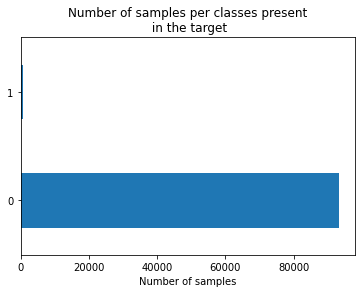

In [172]:
# OPTIONAL: Plot distribution of y
# y is etremely uneven distributed
# TBA: ?
import matplotlib.pyplot as plt

y.value_counts().plot.barh()
plt.xlabel("Number of samples")
_ = plt.title("Number of samples per classes present\n in the target")

In [173]:
# Set up our training and testing data. 
from sklearn.model_selection import train_test_split
# TBA: set sub parameters (testsize etc.)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, random_state=123, test_size=0.5)

## Dummy Model

In [184]:
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X_train, y_train)
print(f"Accuracy of the dummy classifier: "
      f"{dummy_classifier.score(X_test, y_test):.3f}")

Accuracy of the dummy classifier: 0.994


## Logistic Regression

In [219]:
# create a first modeL: Logistic Regression Model
from sklearn.linear_model import LogisticRegression

classifier_no_weights = LogisticRegression(max_iter= 1000)
classifier_no_weights.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [220]:
# LogisticRegression .score in order to compute the accuracy score.
classifier_no_weights.score(X_test, y_test)

0.9937889519920022

In [221]:
# Using 'balanced accuracy' metric  which in binary and multiclass classification problems is used to deal with imbalanced datasets.
# It is defined as the average of recall obtained on each class.
 
from sklearn.metrics import balanced_accuracy_score

target_predicted = classifier_no_weights.predict(X_test)

balanced_accuracy = balanced_accuracy_score(y_test, target_predicted)
print(f"Balanced accuracy: {balanced_accuracy:.2f}")

Balanced accuracy: 0.50


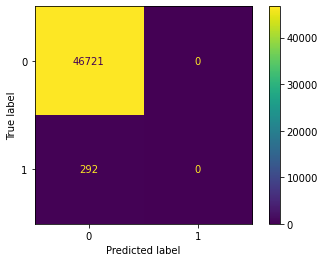

In [222]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(classifier_no_weights, X_test, y_test)

## *class_weights using the distribution of the y variables*

In [187]:
# class_weights using the distribution of the y variables

from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(y)
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)
class_weights

array([ 0.50297422, 84.5557554 ])

In [211]:
# computing Logistic Regression Model
classifier_class_weights = LogisticRegression(max_iter= 1500, class_weight={0:class_weights[0],1:class_weights[1]})
classifier_class_weights.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.502974216326094, 1: 84.55575539568345},
                   max_iter=1500)

In [212]:
# LogisticRegression .score in order to compute the accuracy score.
classifier_class_weights.score(X_test, y_test)

0.8606555633548167

In [213]:
# Using 'balanced accuracy' metric  which in binary and multiclass classification problems is used to deal with imbalanced datasets.
# It is defined as the average of recall obtained on each class.
 
from sklearn.metrics import balanced_accuracy_score

target_predicted = classifier_class_weights.predict(X_test)

balanced_accuracy = balanced_accuracy_score(y_test, target_predicted)
print(f"Balanced accuracy: {balanced_accuracy:.2f}")

Balanced accuracy: 0.84


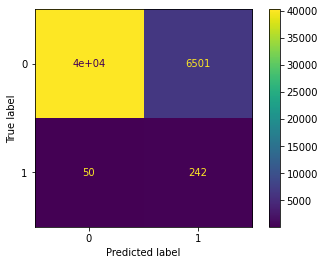

In [214]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(classifier_class_weights, X_test, y_test)

### Precision-recall curve for all



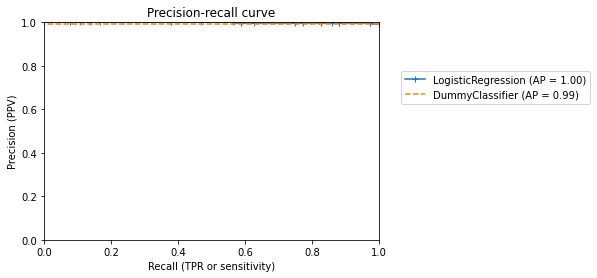

In [233]:
# Precision-recall Curve
from sklearn.metrics import PrecisionRecallDisplay

disp = PrecisionRecallDisplay.from_estimator(
    classifier_class_weights, X_test, y_test, pos_label= 0,
    marker="+")
disp = PrecisionRecallDisplay.from_estimator(
    dummy_classifier, X_test, y_test, pos_label= 0,
    color="tab:orange", linestyle="--", ax=disp.ax_)
plt.xlabel("Recall (TPR or sensitivity)")
plt.ylabel("Precision (PPV)")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = disp.ax_.set_title("Precision-recall curve")

###Receiver Operating Characteristic (ROC) curve for All

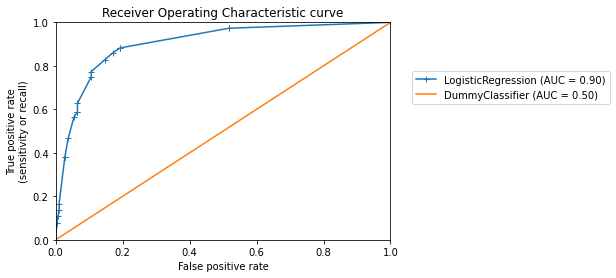

In [234]:
# Receiver Operating Characteristic (ROC) Curve
from sklearn.metrics import RocCurveDisplay

disp = RocCurveDisplay.from_estimator(
    classifier_class_weights, X_test, y_test, pos_label= 0,
    marker="+")
disp = RocCurveDisplay.from_estimator(
    dummy_classifier, X_test, y_test, pos_label= 0,
    color="tab:orange", ax=disp.ax_)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate\n(sensitivity or recall)")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = disp.ax_.set_title("Receiver Operating Characteristic curve")

# probability threshold varies for determining prediction and compute the metrics
# Area under the ROC (ROC-AUC) to characterize the generalization performance of our classifier (similar to precision-recall curve above)
# lower bound of the ROC-AUC is 0.5 (generalization performance of dummy classifier)

## Undersampling and Oversampling 

In [193]:
# Implementation of Roughly Balanced Bagging for binary problem.

# using a RandomUnderSampler or RandomOverSampler will create exactly the desired number of samples
# However, it does not follow the statistical spirit wanted in the bagging framework.

# not working in the moment

from collections import Counter
from imblearn import FunctionSampler
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import cross_validate

def roughly_balanced_bagging(X, y, replace=False):
    
    # find the minority and majority classes
    class_counts = Counter(y)
    majority_class = max(class_counts, key=class_counts.get)
    minority_class = min(class_counts, key=class_counts.get)

    # compute the number of sample to draw from the majority class using
    # a negative binomial distribution
    n_minority_class = class_counts[minority_class]
    n_majority_resampled = np.random.negative_binomial(n=n_minority_class, p=0.5)

    # draw randomly with or without replacement
    majority_indices = np.random.choice(
        np.flatnonzero(y == majority_class),
        size=n_majority_resampled,
        replace=replace,
    )
    minority_indices = np.random.choice(
        np.flatnonzero(y == minority_class),
        size=n_minority_class,
        replace=replace,
    )
    indices = np.hstack([majority_indices, minority_indices])

    return X[indices], y[indices]


# Roughly Balanced Bagging
rbb = BalancedBaggingClassifier(
    sampler=FunctionSampler(func=roughly_balanced_bagging, kw_args={"replace": True})
)
cv_results = cross_validate(rbb, X, y, scoring="balanced_accuracy")

print(f"{cv_results['test_score'].mean():.3f} +/- {cv_results['test_score'].std():.3f}")

nan +/- nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/ensemble/_bagging.py", line 321, in fit
    return self._fit(X, y, self.max_samples, sample_weight=None)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py", line 337, in _fit
    max_features = self.max_features * self.n_features_in_
Attri

## Best Threshold Evaluation Metric

In [ ]:
# This is only an example by now
## Another option would be to change our Evaluation Metric in accordance to the imbalance
# function to get the best threshold for maximizing F1 score for binary predictions

def bestThresshold(y_true,y_pred):
    best_thresh = None
    best_score = 0
    for thresh in np.arange(0.1, 0.501, 0.01):
        score = f1_score(y_true, np.array(y_pred)>thresh)
        if score > best_score:
            best_thresh = thresh
            best_score = score
    return best_score , best_thresh

## Random Forest Classifier

In [194]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
 
# Train model
classifier_forest = RandomForestClassifier(random_state=123)
classifier_forest.fit(X, y)
 
# Predict on training set
pred_y_forest = classifier_forest.predict(X)
 
# Is our model still predicting just one class?
print(np.unique(pred_y_forest))
# this model is only predicting 0, which means it’s completely ignoring the minority class in favor of the majority class
 
# How's our accuracy?
print(accuracy_score(y, pred_y_forest))
 
# What about AUROC?
# Area Under ROC Curve (AUROC) represents the likelihood of your model distinguishing observations from two classes
prob_y_forest = classifier_forest.predict_proba(X)
prob_y_forest = [p[1] for p in prob_y_forest]
print(roc_auc_score(y, prob_y_forest))

[0]
0.9939378469784953
0.9101279014498238
